## Objectives and Project Plan
- **Objective:**  Visualize Top Earning/Perfoming Artists per music Genre
  ## Project Plan 
  1. Import Inportant Libraries(pyodbc, pandas, matplotlib, seaborn)
  2. Connection to SQL Server Database
  3. Run Query and Read Artists Data into Data Frame
  4. Inspection  of Data
  5. Visualization of Trends (Top Earners/Performers)
  6. Locating Image of Visuals


### 1. Import Important Libraries 

In [6]:
pip install pyodbc

Note: you may need to restart the kernel to use updated packages.


In [17]:
 pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.5/1.8 MB 1.3 MB/s eta 0:00:01
   ----------------------------- ---------- 1.3/1.8 MB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 2.9 MB/s  0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.2
    Uninstalling pip-25.2:
      Successfully uninstalled pip-25.2
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc

### 2. Connect to SQL Server DB

In [12]:
#Define Connection Parameter
server = 'DESKTOP-U507UFU'
database = 'PRACTICE'

#Create a Connection string (Trusted Windows Authentication)
conn_str = (
    "Driver={SQL Server};"
    f"Server={server};"
    f"Database={database};"
    "Trusted_Connection=yes;"   
)
#Establish the Connection
conn = pyodbc.connect(conn_str)


###  3. Run Query and Read Artists Data Into Data Frame

In [14]:
query = """

WITH ranked_concerts_cte AS (
    SELECT 
    artist_name,
    concert_revenue,
    genre,
    number_of_members,
    CAST(concert_revenue/ number_of_members AS FLOAT) AS revenue_per_member,
    RANK()OVER(
           PARTITION BY genre
           ORDER BY (concert_revenue/ number_of_members) DESC)
           AS ranked_artists
   FROM concerts  
    )


SELECT 
    artist_name,
    genre,
    number_of_members,
    revenue_per_member
FROM ranked_concerts_cte
WHERE ranked_artists = 1
ORDER BY revenue_per_member DESC;

"""
df = pd.read_sql(query, conn)
conn.close()

C:\Users\User\AppData\Local\Temp\ipykernel_1908\2417789971.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


### 4.  Inspection of Our Data

In [15]:
df.head()

,artist_name,genre,number_of_members,revenue_per_member
0,The Weeknd,R&B/Pop,1,890812.8100
1,Ariana Grande,Pop,1,881544.5400
2,Eminem,Hip-Hop,1,654919.0100
3,Beyonce,R&B,1,638938.1200
4,Blackpink,K-Pop,4,221804.9325


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   artist_name         5 non-null      object 
 1   genre               5 non-null      object 
 2   number_of_members   5 non-null      object 
 3   revenue_per_member  5 non-null      float64
dtypes: float64(1), object(3)
memory usage: 292.0+ bytes


In [17]:
df.shape

(5, 4)

In [18]:
df.describe()

,revenue_per_member
count,5.000000
mean,657603.882500
std,271483.040906
min,221804.932500
25%,638938.120000
50%,654919.010000
75%,881544.540000
max,890812.810000


In [19]:
df.head()

,artist_name,genre,number_of_members,revenue_per_member
0,The Weeknd,R&B/Pop,1,890812.8100
1,Ariana Grande,Pop,1,881544.5400
2,Eminem,Hip-Hop,1,654919.0100
3,Beyonce,R&B,1,638938.1200
4,Blackpink,K-Pop,4,221804.9325


### 5. Visualization of Trends (Top Perfomers per Genre )

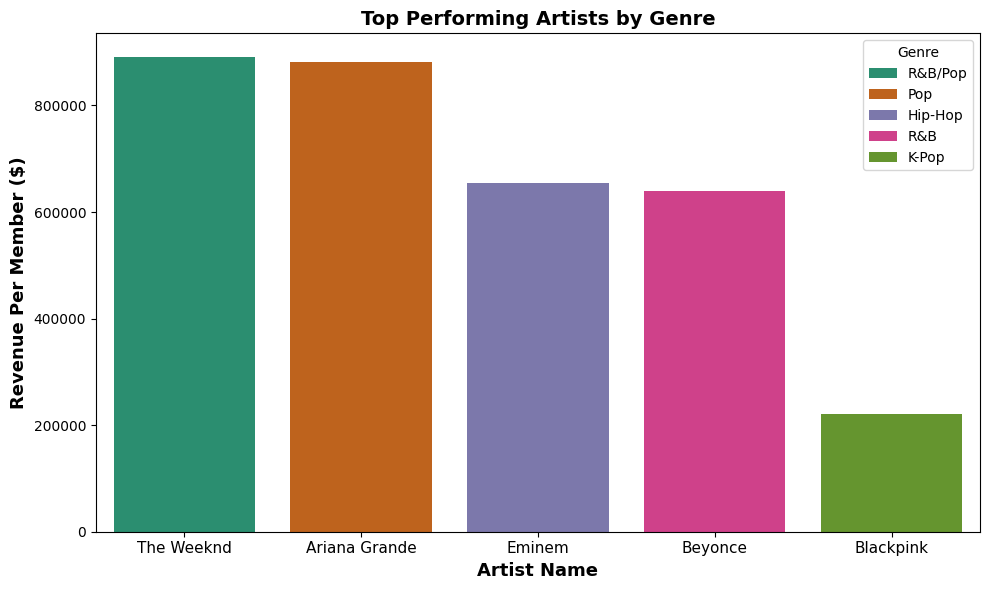

In [86]:
# Step 1: Strip whitespace from column names
df.columns = df.columns.str.strip()

# Step 2: Sort by revenue per member
Top_perfomers = df.sort_values(by='revenue_per_member', ascending=False)

# Step 3: Create bar chart with genre as hue
plt.figure(figsize=(10,6))
sns.barplot(
    data=Top_perfomers,
    x='artist_name',
    y='revenue_per_member',
    hue='genre',  # For  genre-based color coding
    dodge=False,  # Keeps bars stacked by artist
    palette='Dark2' 
)

# Step 4: Customize the plot
plt.title("Top Performing Artists by Genre", fontsize=14, fontweight='bold')
plt.xlabel("Artist Name", fontsize =13, fontweight = 'bold')
plt.ylabel("Revenue Per Member ($)", fontsize = 13, fontweight='bold')
plt.xticks(fontsize=11) 
plt.legend(title='Genre')
plt.tight_layout()
plt.savefig("Top_Perfoming_Artist.png", dpi=300, bbox_inches = 'tight')
plt.show()


##  Method 2:(Using Piechart)

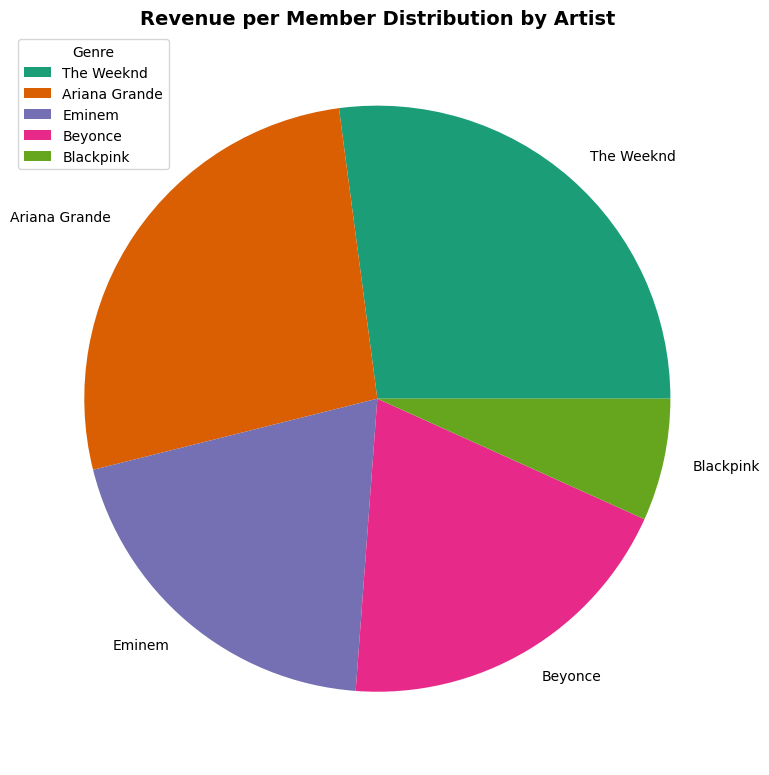

In [93]:
#Step 1: Strip White spaces from column names
df.coumns = df.columns.str.strip()

#Step 2: Sort by revenue per member 
Top_Perfomers =df.sort_values(by='revenue_per_member', ascending = False)

#Step 3: Prepare Data for pie chart
labels = Top_perfomers['artist_name']
sizes = Top_perfomers['revenue_per_member']
colors = sns.color_palette('Dark2', len(labels))

#Step 4: Create pie chart
plt.figure(figsize=(8,8))
plt.pie(
    sizes,
    labels=labels,
    colors=colors   
)

#Step 5 :Customize the Plot
plt.title("Revenue per Member Distribution by Artist", fontsize=14, fontweight='bold')
plt.legend(title='Genre')
plt.tight_layout()
plt.savefig("Revenue_per_Member.png", dpi = 300, bbox_inches='tight')
plt.show()

## 5. Locating the Visuals 

In [73]:
import os
print(os.getcwd())

D:\SQL  PRACTICE\music_concert\top performing Artists
